# Pre-Requisites

In [ ]:
%pip install nltk
%pip install gensim

In [ ]:
import nltk
nltk.download('punkt')

# Example

In [ ]:
from nltk.tokenize import word_tokenize

data = "Mars is approximately half the diameter of Earth."
word_tokenize(data)

In [ ]:
from nltk.tokenize import sent_tokenize

data = "Mars is a cold desert world. It is half the size of Earth. "
sent_tokenize(data)

# Actual Implementation

## Open file and tokenize sentences
Create a .txt file and write 4-5 sentences in it. Include the file with the same directory of your Python program. Now, we are going to open this file with Python and split sentences.

In [28]:
from nltk.tokenize import word_tokenize, sent_tokenize

file_docs = []

with open ('document1.txt') as f:
    tokens = sent_tokenize(f.read())
    for line in tokens:
        file_docs.append(line)

print("Number of documents:",len(file_docs))
file_docs

Number of documents: 7


['The United States of America (USA), commonly known as the United States (U.S.) or America, is a country primarily located in North America.',
 'It consists of 50 states, a federal district, five major unincorporated territories, and nine Minor Outlying Islands.',
 '[i] It includes 326 Indian reservations.',
 "The U.S. is the world's third-largest country by land and total area.",
 '[c] It shares land borders with Canada to its north and with Mexico to its south and has maritime borders with the Bahamas, Cuba, Russia, and other nations.',
 '[j] With a population of over 333 million,[k] it is the most populous country in the Americas and the third-most populous in the world.',
 'The national capital of the United States is Washington, D.C., and its most populous city and principal financial center is New York City.']

## Tokenize words and create dictionary
Once we added tokenized sentences in array, it is time to tokenize words for each sentence.

In [ ]:
gen_docs = [[w.lower() for w in word_tokenize(text)] 
            for text in file_docs]

# gen_docs

In order to work on text documents, Gensim requires the words (aka tokens) be converted to unique ids. So, Gensim lets you create a Dictionary object that maps each word to a unique id. Let's convert our sentences to a [list of words] and pass it to the corpora.Dictionary() object.

In [ ]:
import gensim

dictionary = gensim.corpora.Dictionary(gen_docs)
# print(dictionary.token2id)

A dictionary maps every word to a number. Gensim lets you read the text and update the dictionary, one line at a time, without loading the entire text file into system memory.

## Create a bag of words
The next important object you need to familiarize with in order to work in gensim is the Corpus (a Bag of Words). It is a basically object that contains the word id and its frequency in each document (just lists the number of times each word occurs in the sentence).

Note that, a ‘token’ typically means a ‘word’. A ‘document’ can typically refer to a ‘sentence’ or ‘paragraph’ and a ‘corpus’ is typically a ‘collection of documents as a bag of words’.

In [ ]:
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]
# corpus

## TFIDF
Term Frequency – Inverse Document Frequency(TF-IDF) is also a bag-of-words model but unlike the regular corpus, TFIDF down weights tokens (words) that appears frequently across documents.

Tf-Idf is calculated by multiplying a local component (TF) with a global component (IDF) and optionally normalizing the result to unit length. Term frequency is how often the word shows up in the document and inverse document frequency scales the value by how rare the word is in the corpus. In simple terms, words that occur more frequently across the documents get smaller weights.

In [ ]:
import numpy as np

tf_idf = gensim.models.TfidfModel(corpus)

for doc in tf_idf[corpus]:
    print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])

## Creating similarity measure object
Now, we are going to create similarity object. The main class is Similarity, which builds an index for a given set of documents.The Similarity class splits the index into several smaller sub-indexes, which are disk-based. Let's just create similarity object then you will understand how we can use it for comparing.

In [ ]:
import os

# building the index
sims = gensim.similarities.Similarity('workdir/',tf_idf[corpus],num_features=len(dictionary))

# The corrected part: Use an existing folder or create a new one
if not os.path.exists('workdir/'):
    os.makedirs('workdir/')

## Create Query Document
Once the index is built, we are going to calculate how similar is this query document to each document in the index. So, create second .txt file which will include query documents or sentences and tokenize them as we did before.

In [ ]:
file2_docs = []

with open ('document2.txt') as f:
    tokens = sent_tokenize(f.read())
    for line in tokens:
        file2_docs.append(line)

print("Number of documents:",len(file2_docs))  

query_doc = [[w.lower() for w in word_tokenize(text)] 
            for text in file2_docs]
                
dictionary = gensim.corpora.Dictionary(query_doc)

query_doc_bow = [dictionary.doc2bow(doc) for doc in query_doc]
    
print(query_doc_bow)

## Document similarities to query
At this stage, you will see similarities between the query and all index documents. To obtain similarities of our query document against the indexed documents. Cosine measure returns similarities in the range <-1, 1> (the greater, the more similar).

In [ ]:

# perform a similarity query against the corpus
query_doc_tf_idf = tf_idf[query_doc_bow]
# print(document_number, document_similarity)
print('Comparing Result:', sims[query_doc_tf_idf]) 


Assume that our documents are:

Mars is the fourth planet in our solar system.
It is second-smallest planet in the Solar System after Mercury. 
Saturn is yellow planet.
and query document is:

Saturn is the sixth planet from the Sun.
Output:

[0.11641413 0.10281226 0.56890744]
As a result, we can see that third document is most similar

## Average Similarity
What's next? I think it is better to calculate average similarity of query document. At this time, we are going to import numpy to calculate sum of these similarity outputs.
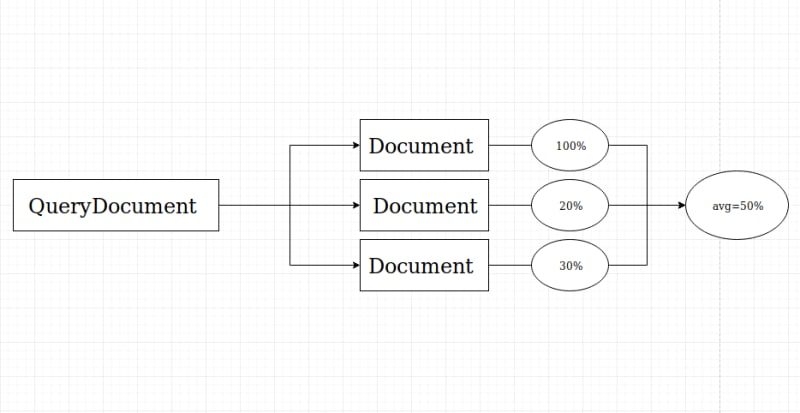

In [ ]:

sum_of_sims =(np.sum(sims[query_doc_tf_idf], dtype=np.float32))
print(sum_of_sims)

To calculate average similarity we have to divide this value with count of documents

In [ ]:
percentage_of_similarity = round(float((sum_of_sims / len(file_docs)) * 100))
print(f'Average similarity float: {float(sum_of_sims / len(file_docs))}')
print(f'Average similarity percentage: {float(sum_of_sims / len(file_docs)) * 100}')
print(f'Average similarity rounded percentage: {percentage_of_similarity}')

Output:

Average similarity float: 0.2627112865447998
Average similarity percentage: 26.27112865447998
Average similarity rounded percentage: 26
Now, we can say that query document (demofile2.txt) is 26% similar to main documents (demofile.txt)